In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/coreysolitaire/Desktop/Python A-Z Programing Course/Module 6 (Advanced Visualizations)'

In [3]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
#Modify names of Columns
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', \
                  'BudgetMillions', 'Year']

In [8]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
#Provides info on Data Type
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
#Provides Descriptive Statistics of Data Set
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
#Year, Film and Genre should be categories not integers.  How to reassign categorical variables..

movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')


In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [13]:
#identify sub-categories in a category (in this case Genre)
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [14]:
#year not dissapears when .describe() is called because it is no longer an intiger
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [15]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="darkgrid", color_codes=True)
#allows us to see vistualizetions inside of jupyter notebook
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

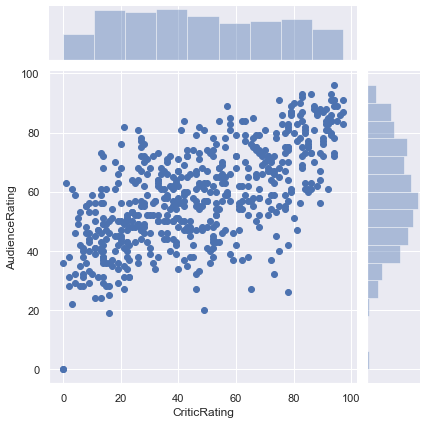

In [16]:
#Jointplots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

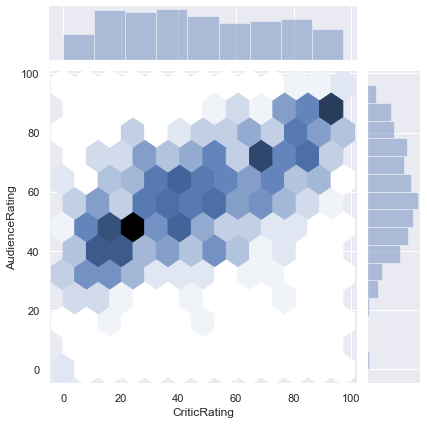

In [17]:
#Variations on a theme.... Scatter Plot to Hex Plot (Plot #1)

#Hex plots are usefull for examining data clusters, darker color = more clusters

j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

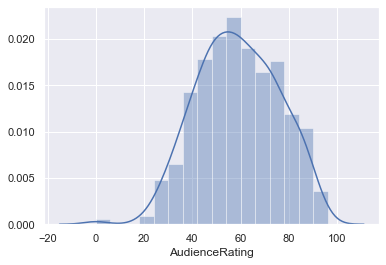

In [18]:
#Histograms
m1=sns.distplot(movies.AudienceRating)

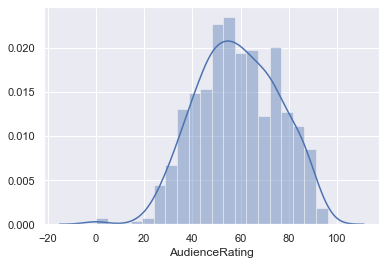

In [19]:
#More or less Bins
m1=sns.distplot(movies.AudienceRating, bins=20)

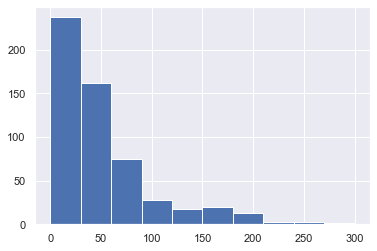

In [20]:
#Stacked Histograms
hi = plt.hist(movies.BudgetMillions)

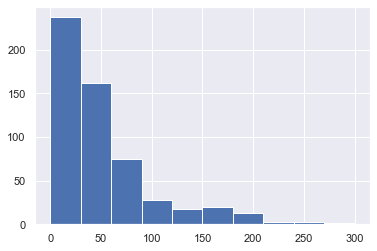

In [21]:
#To hide additional Information
hi = plt.hist(movies.BudgetMillions)
plt.show()

In [22]:
#Lets filter this data set by Genre
movies[movies.Genre == 'Drama']

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


In [23]:
#to access ONLY the Budget data
movies[movies.Genre == 'Drama'].BudgetMillions

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64

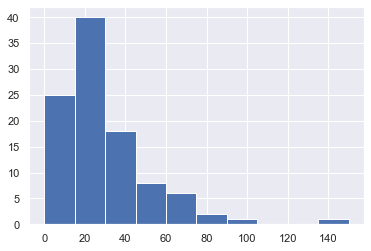

In [24]:
#Now watch what happens when we combine the two (The Budget spent on making "Drama")
hi = plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.show()

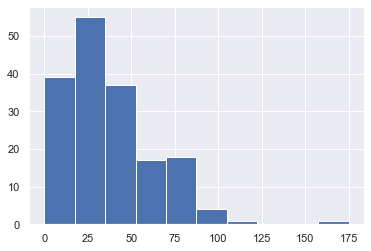

In [25]:
#How does that compare to "Comedy"
hi = plt.hist(movies[movies.Genre == 'Comedy'].BudgetMillions)
plt.show()

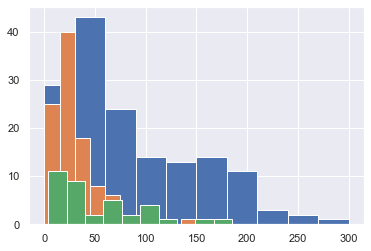

In [26]:
#We can also plot them all at once..
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show()

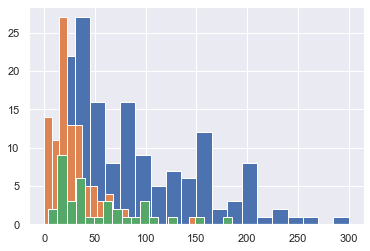

In [27]:
#Lets change all bins to 20 to make them look more uniform..
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=20)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=20)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=20)
plt.show()

In [28]:
# Now lets see if we can stack them
#Step 1. first we need to know all the callable genres
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

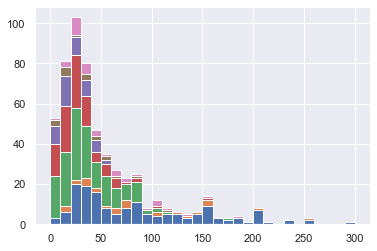

In [29]:
#Step 2. Create a list of Genres in plt.hist (The Long Way)
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
          movies[movies.Genre == 'Adventure'].BudgetMillions, \
          movies[movies.Genre == 'Comedy'].BudgetMillions, \
          movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Horror'].BudgetMillions, \
          movies[movies.Genre == 'Romance'].BudgetMillions, \
          movies[movies.Genre == 'Thriller'].BudgetMillions], bins=30, stacked = True)
plt.show()

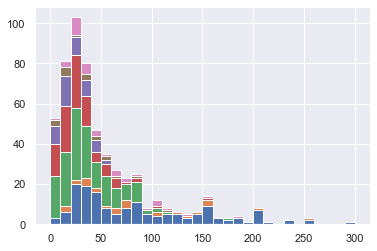

In [30]:
# The "Pythonic" Way, using loops
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)

h=plt.hist(list1, bins = 30, stacked = True)

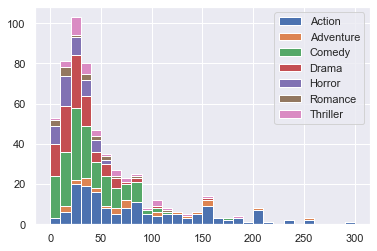

In [31]:
#Time to add the labels

mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) #adds labels
plt.legend() #shows labels

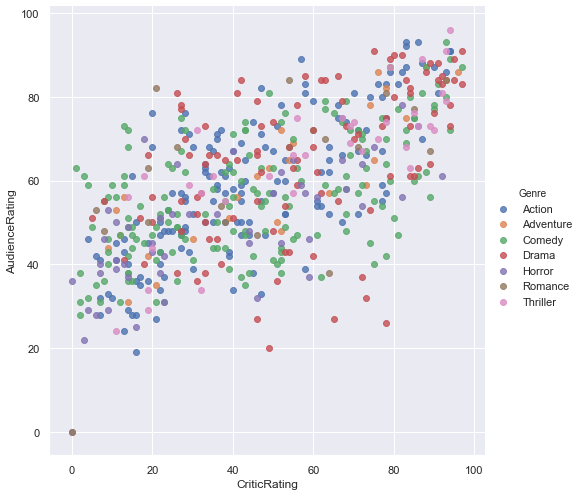

In [32]:
#KDE(Kernal Density Estimate) Plot Critic Rating vs. Audience Rating

#First, scatter plot reivew...
vis1=sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
               fit_reg=False, hue='Genre', \
               height=7, aspect=1)


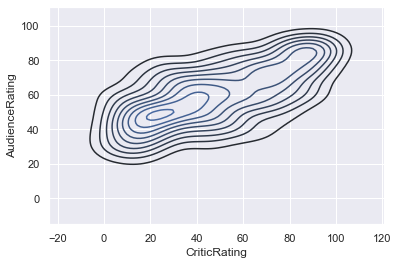

In [33]:
#Now on to the KDE Plot
#Same information as scatter plot, but shows distibution density

k1=sns.kdeplot(movies.CriticRating, movies.AudienceRating)

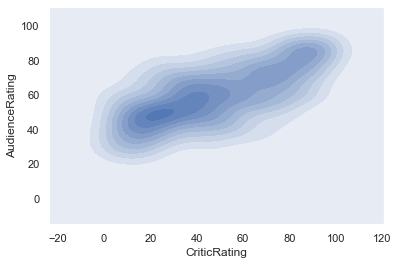

In [34]:
#now lets spice things up with some color...

k1=sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True)

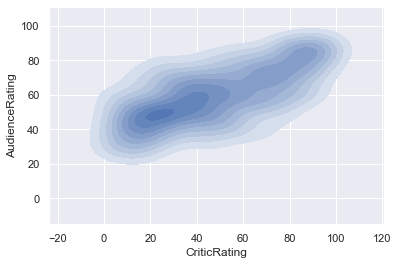

In [35]:
#how about color but return the background grid..

k1=sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False)

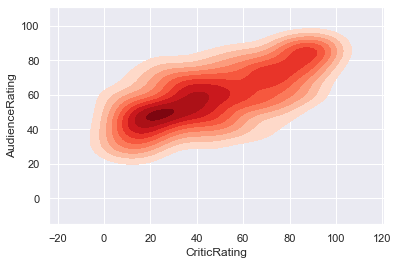

In [36]:
#what about if you like red?

k1=sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Reds')

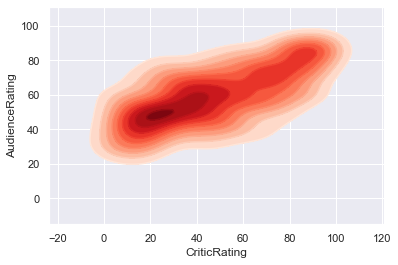

In [37]:
#For a crisp clean look try running both codes....

k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Reds')
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds')

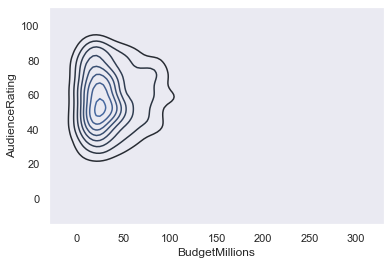

In [38]:
#Explore style in KDP Plots using audience rating
sns.set_style('dark') #eliminates background grid
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

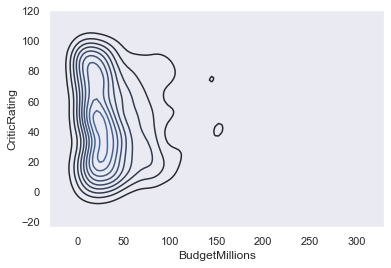

In [39]:
#now lets visualize critic rating

sns.set_style('dark') 
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

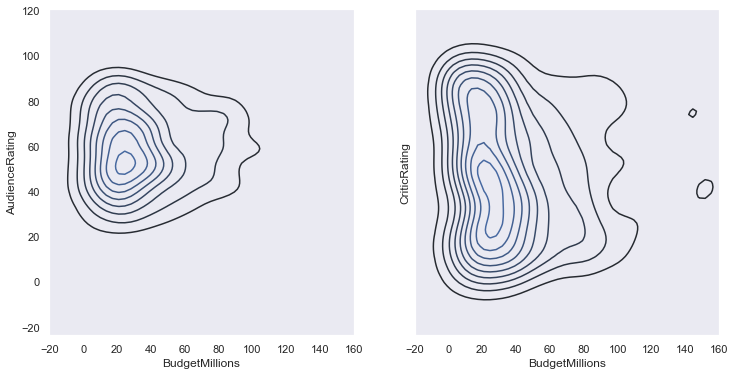

In [40]:
#Working with the sub-plot function, how to display Audience Rating and Cirtic Rating at the Same Time

f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True) #row, #columns, lenght and height of boxes, share defined limits on x and y axis
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0]) #axes[0] identifies plot location
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20, 160)) #defied limits to share between graphs

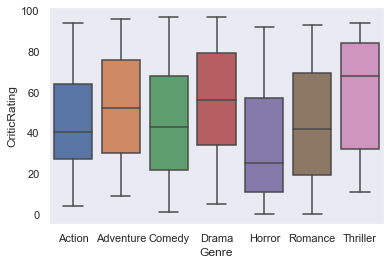

In [41]:
#Box Plots vs. Violin Plots

w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

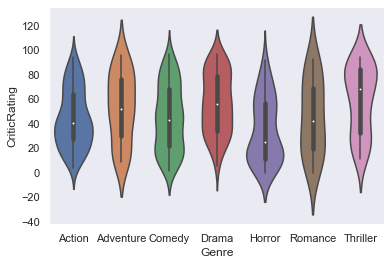

In [42]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

[(-50, 150)]

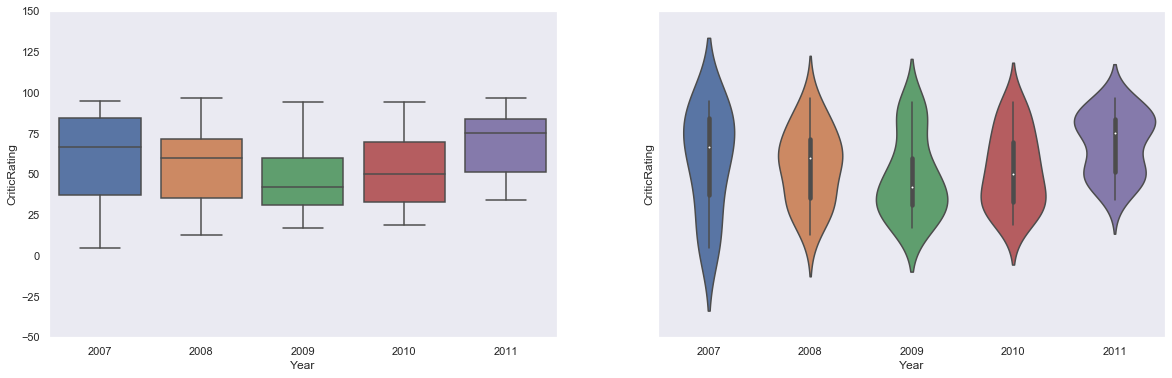

In [43]:
#Lets compaire the two looking specifically at "Dramas" per year

f, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)
k1=sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[0]) 
k2=sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1])
k1.set(ylim=(-50, 150))

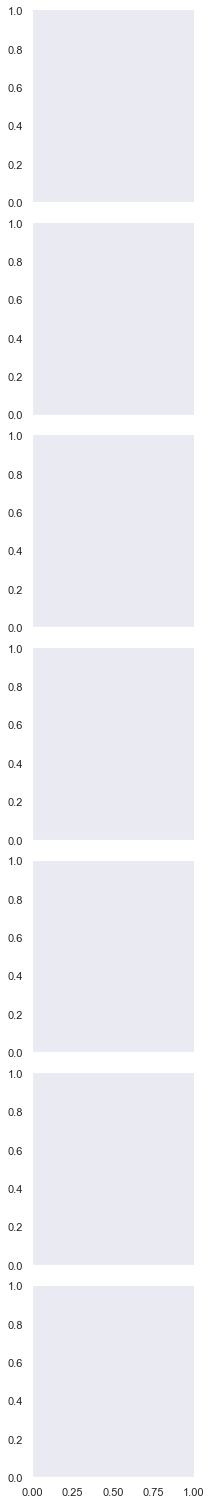

In [44]:
#Creating a facet grid.. spliting up a visualization, not designed for compairson like sub-plot

g = sns.FacetGrid(movies, row='Genre', hue='Genre')

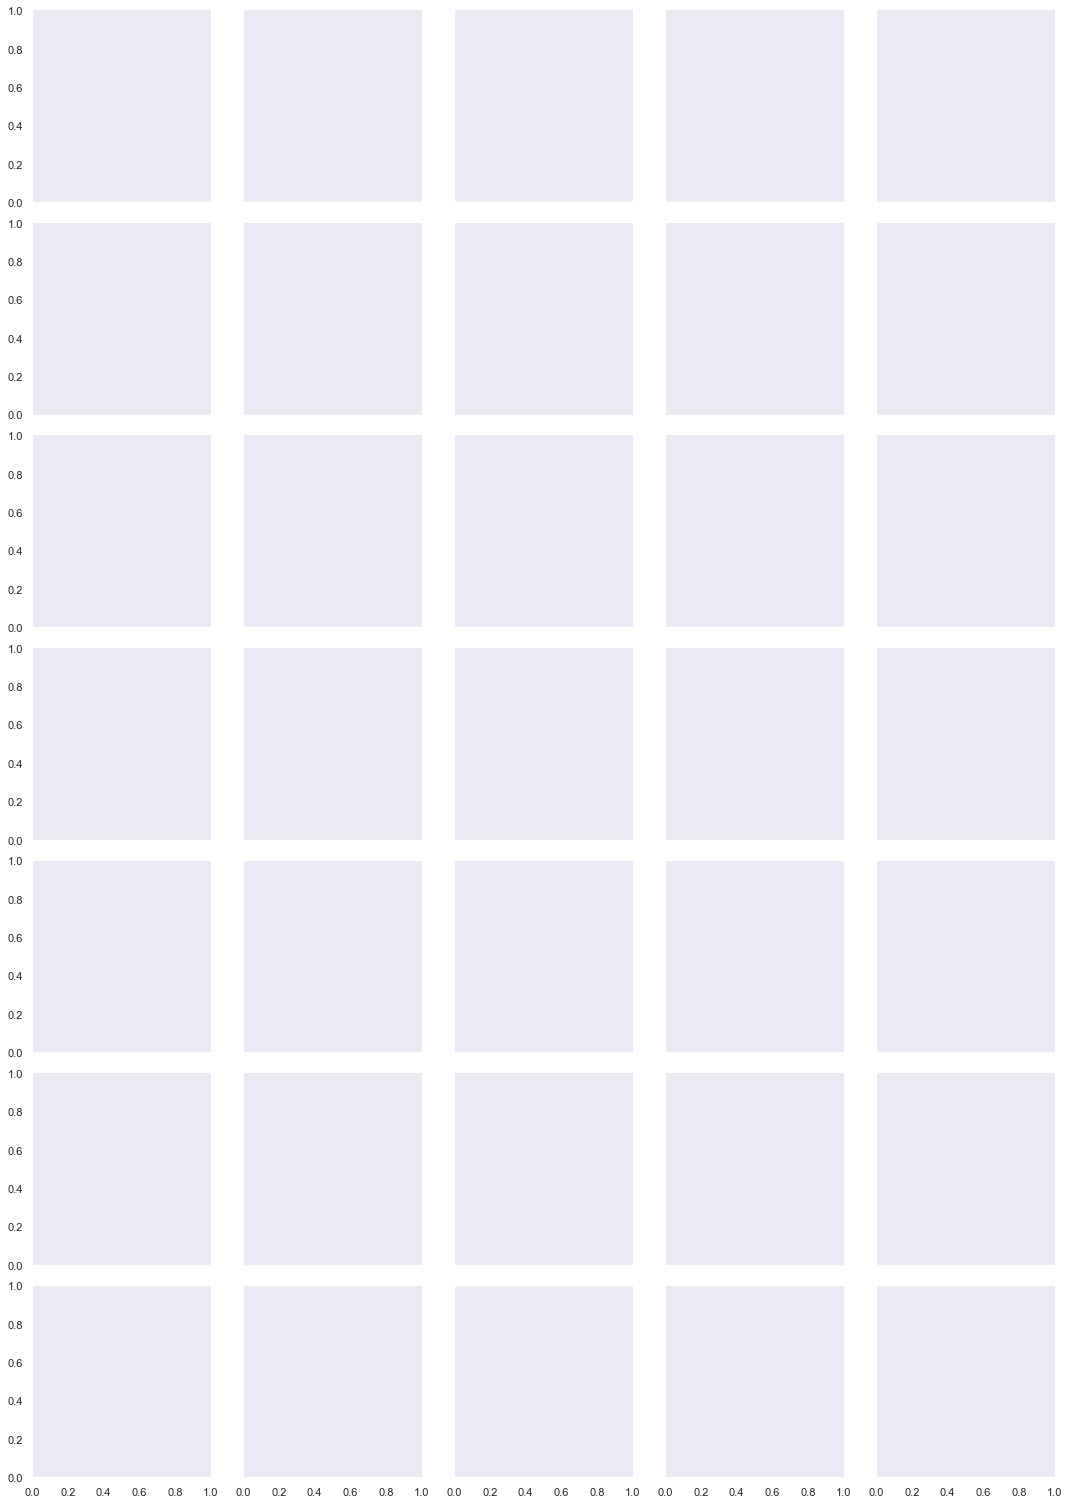

In [45]:
# now lets make it bigger by adding columns=years (7 Genres by 5 Years)

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

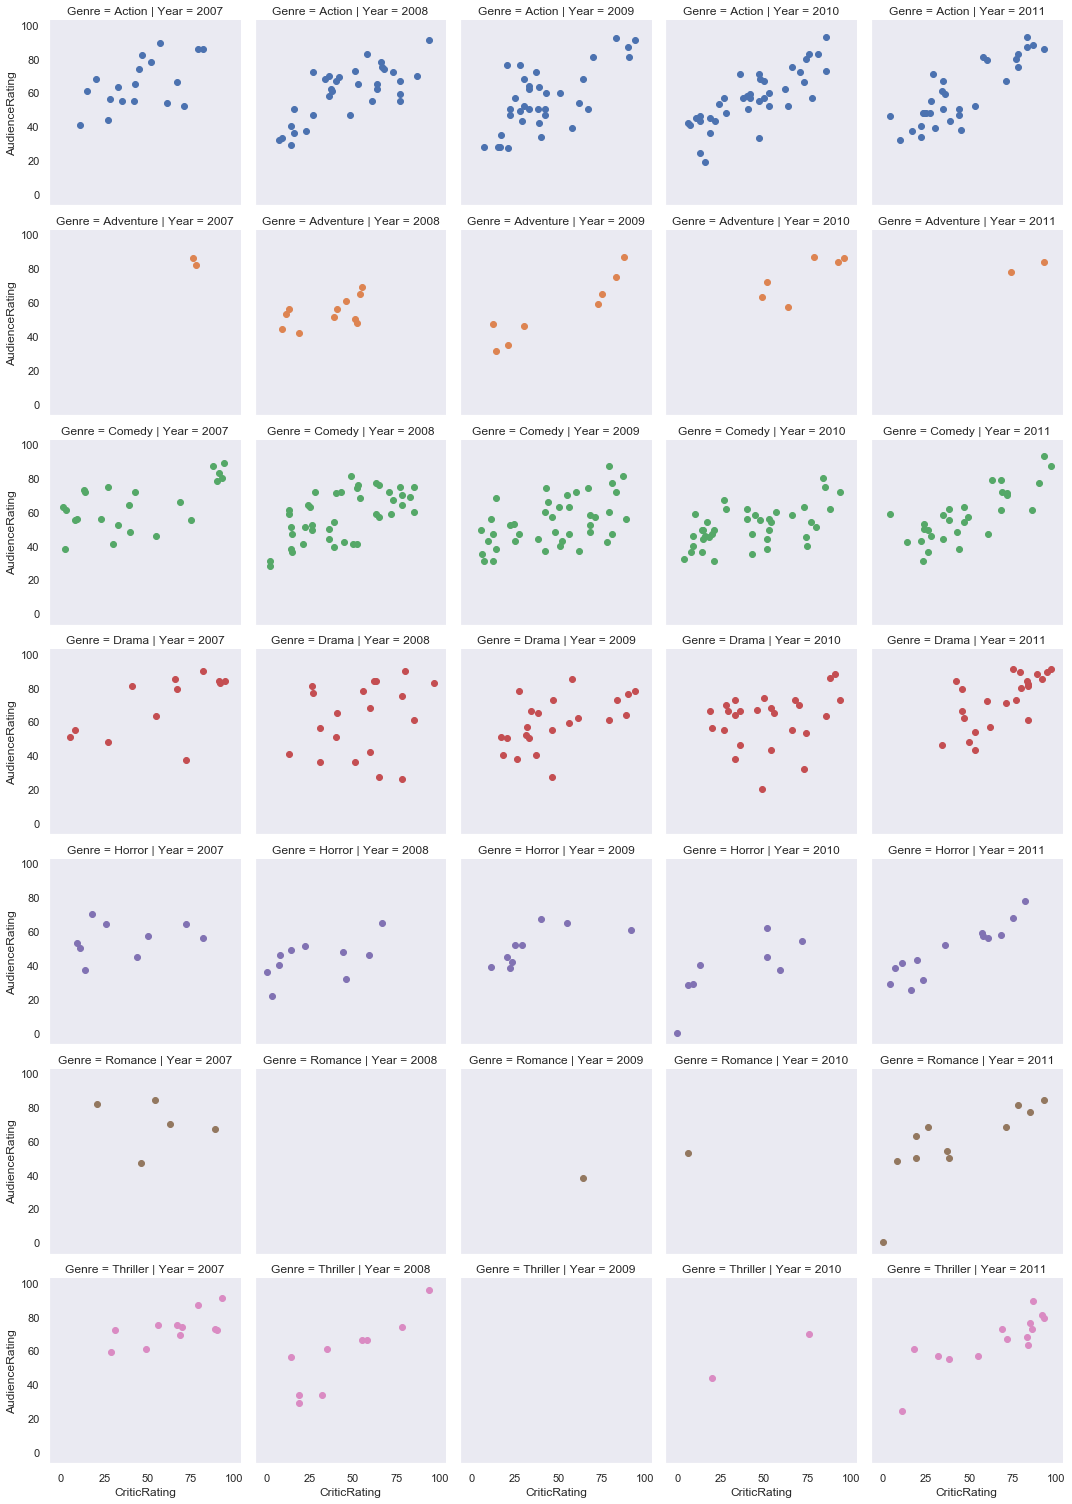

In [46]:
#Maping data to the facet grid, breaking up one large scatter plot in to individual plots
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

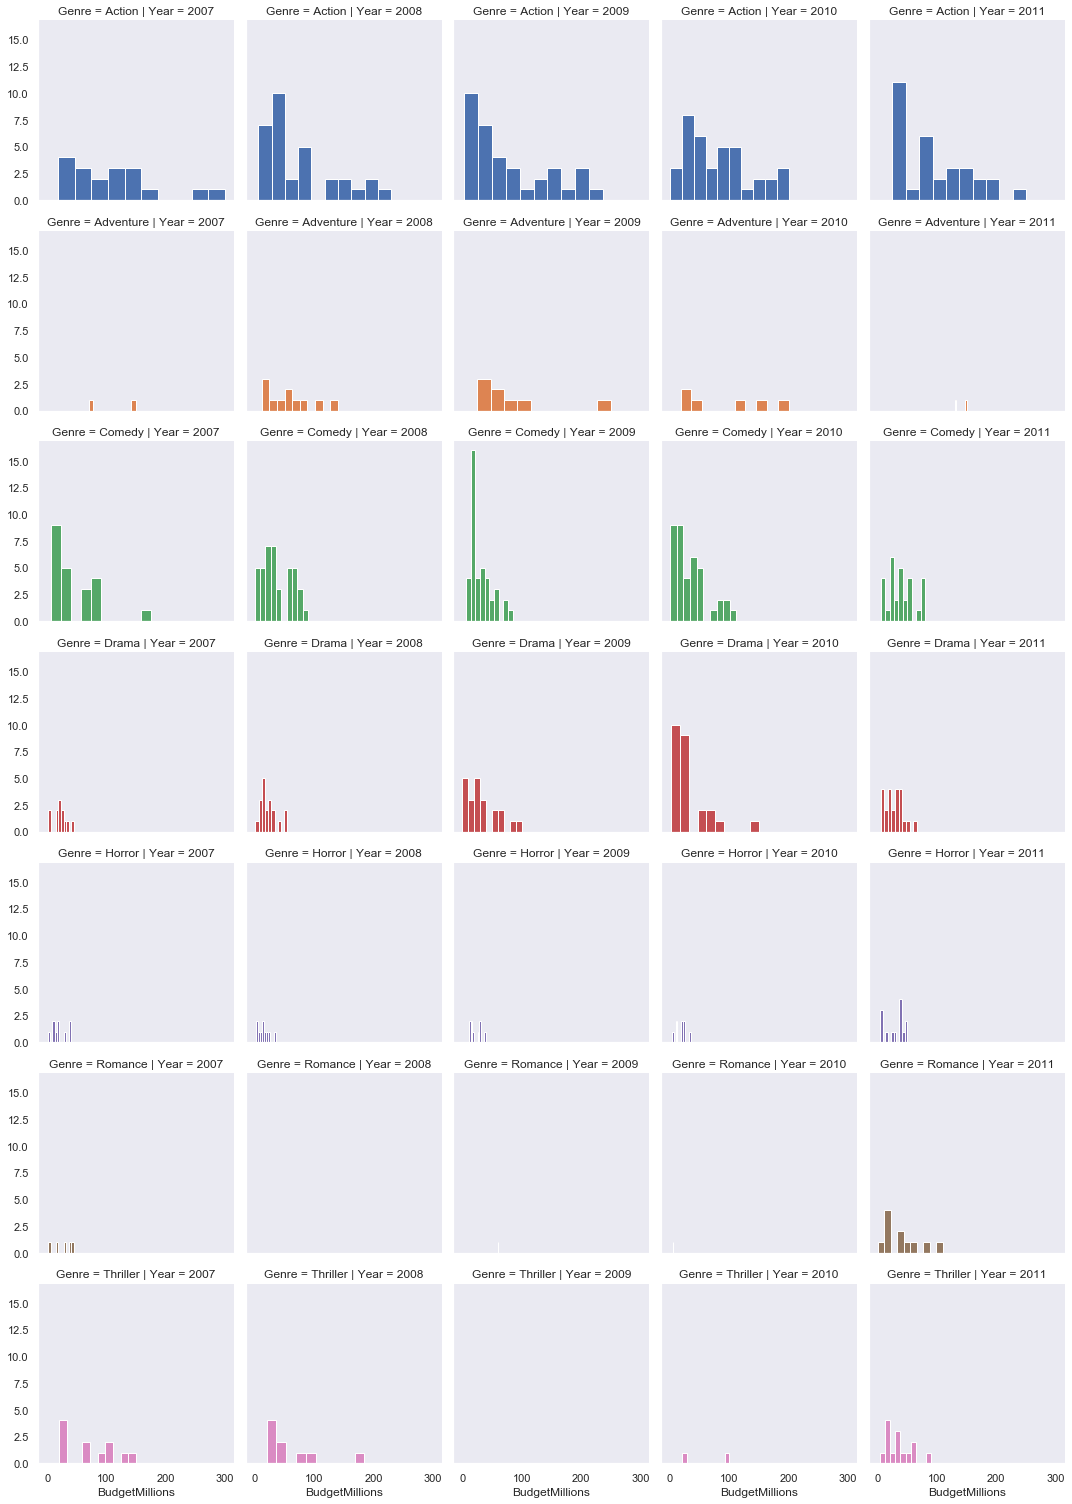

In [47]:
#You can use this function with any type of chart, lets try histograms (only 1 variable)
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

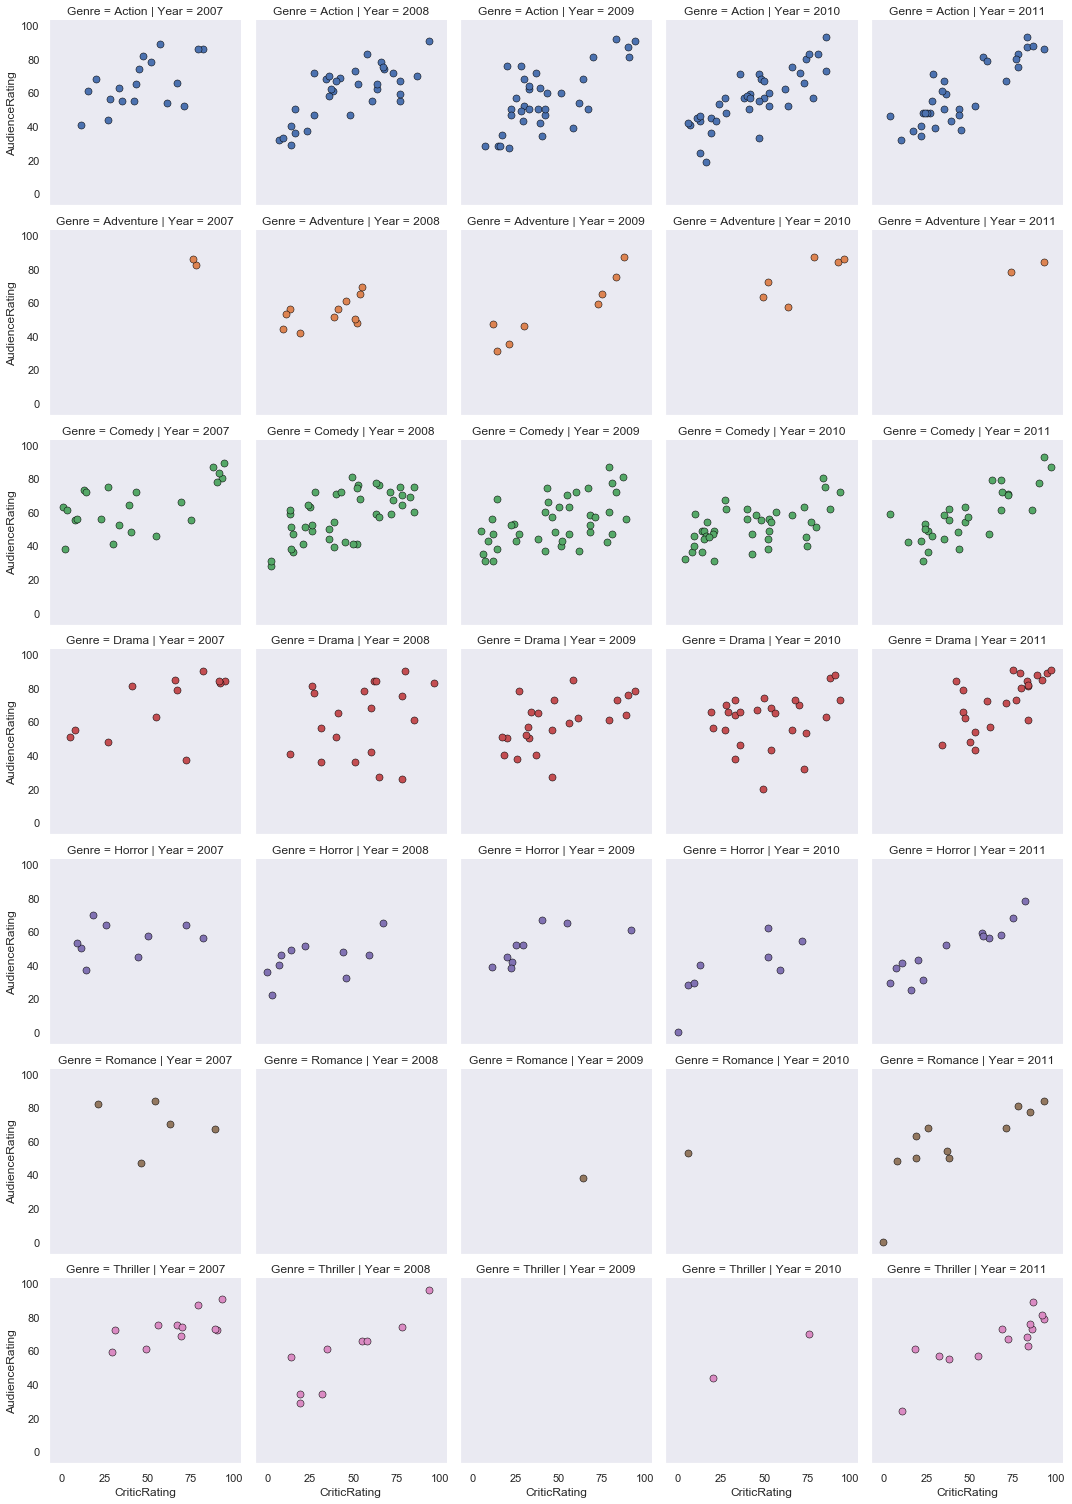

In [48]:
#Using Facet Grids to examing scatter plots with key word arguments (Modify dots in scatter plot)

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

In [49]:
#Now that the data is visible, it is time to control axis and add diagional lines to our Facet Grid

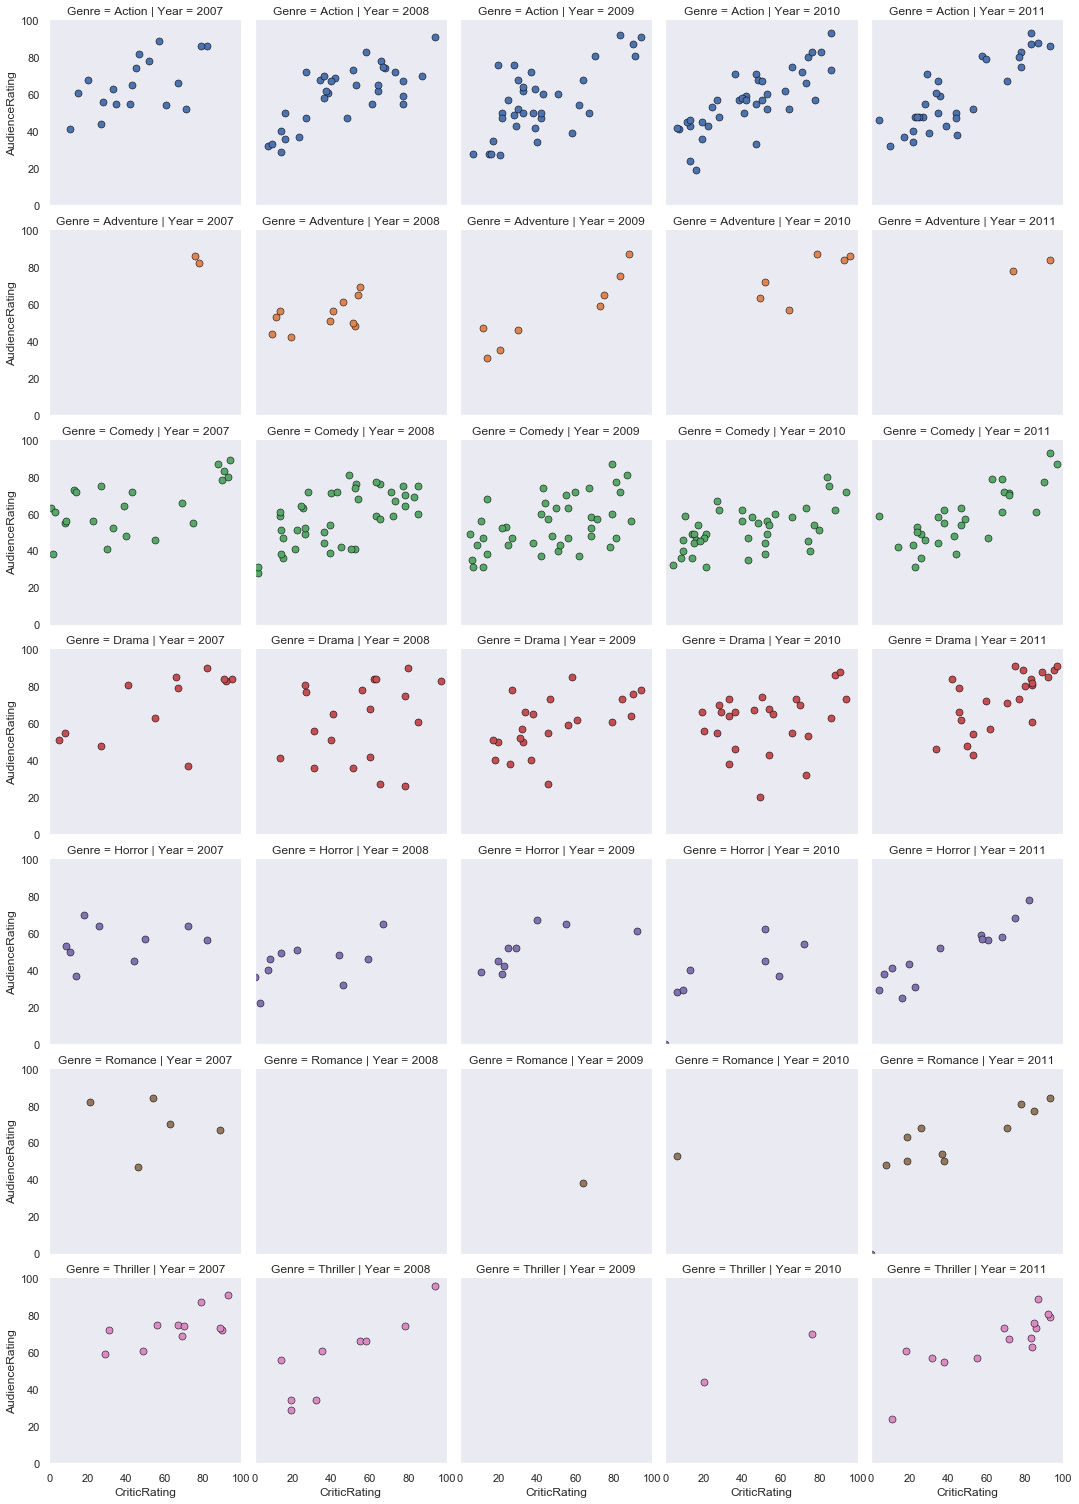

In [50]:
#How to define axis limits

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

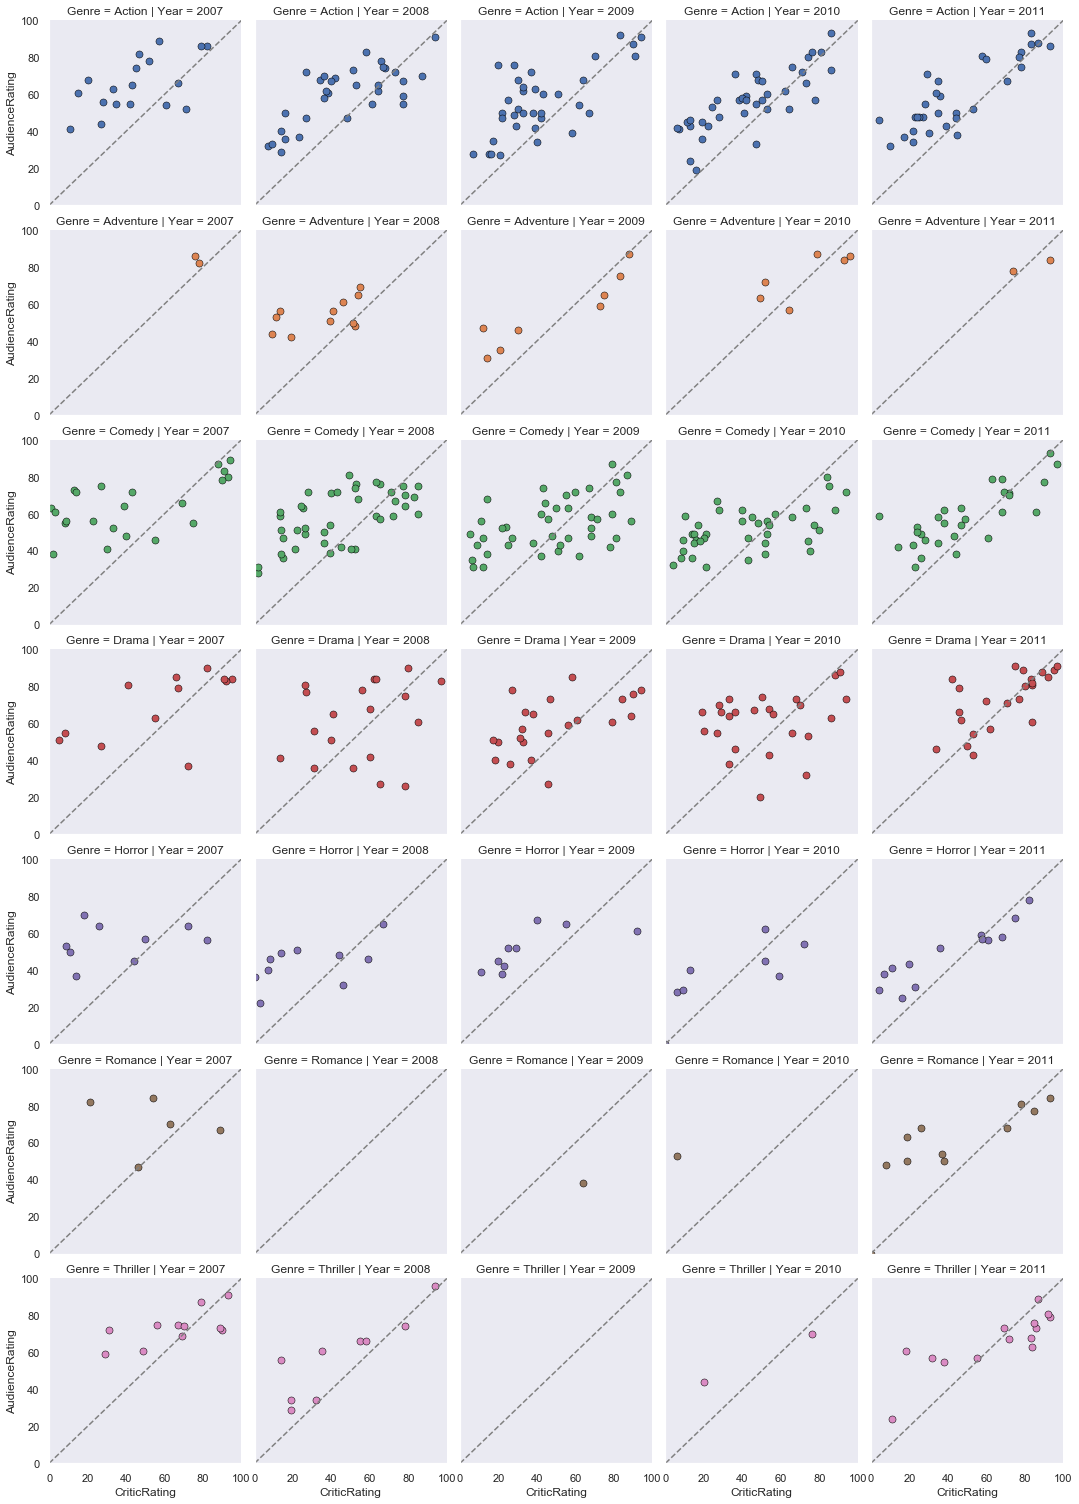

In [51]:
#How to add a diagional line per box

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:  # Iterates over the array as if it were a simple list
    ax.plot((0,100), (0,100), c='gray', ls='--') # Line Dimension X axis origin, Y axis origin, color, line style
    


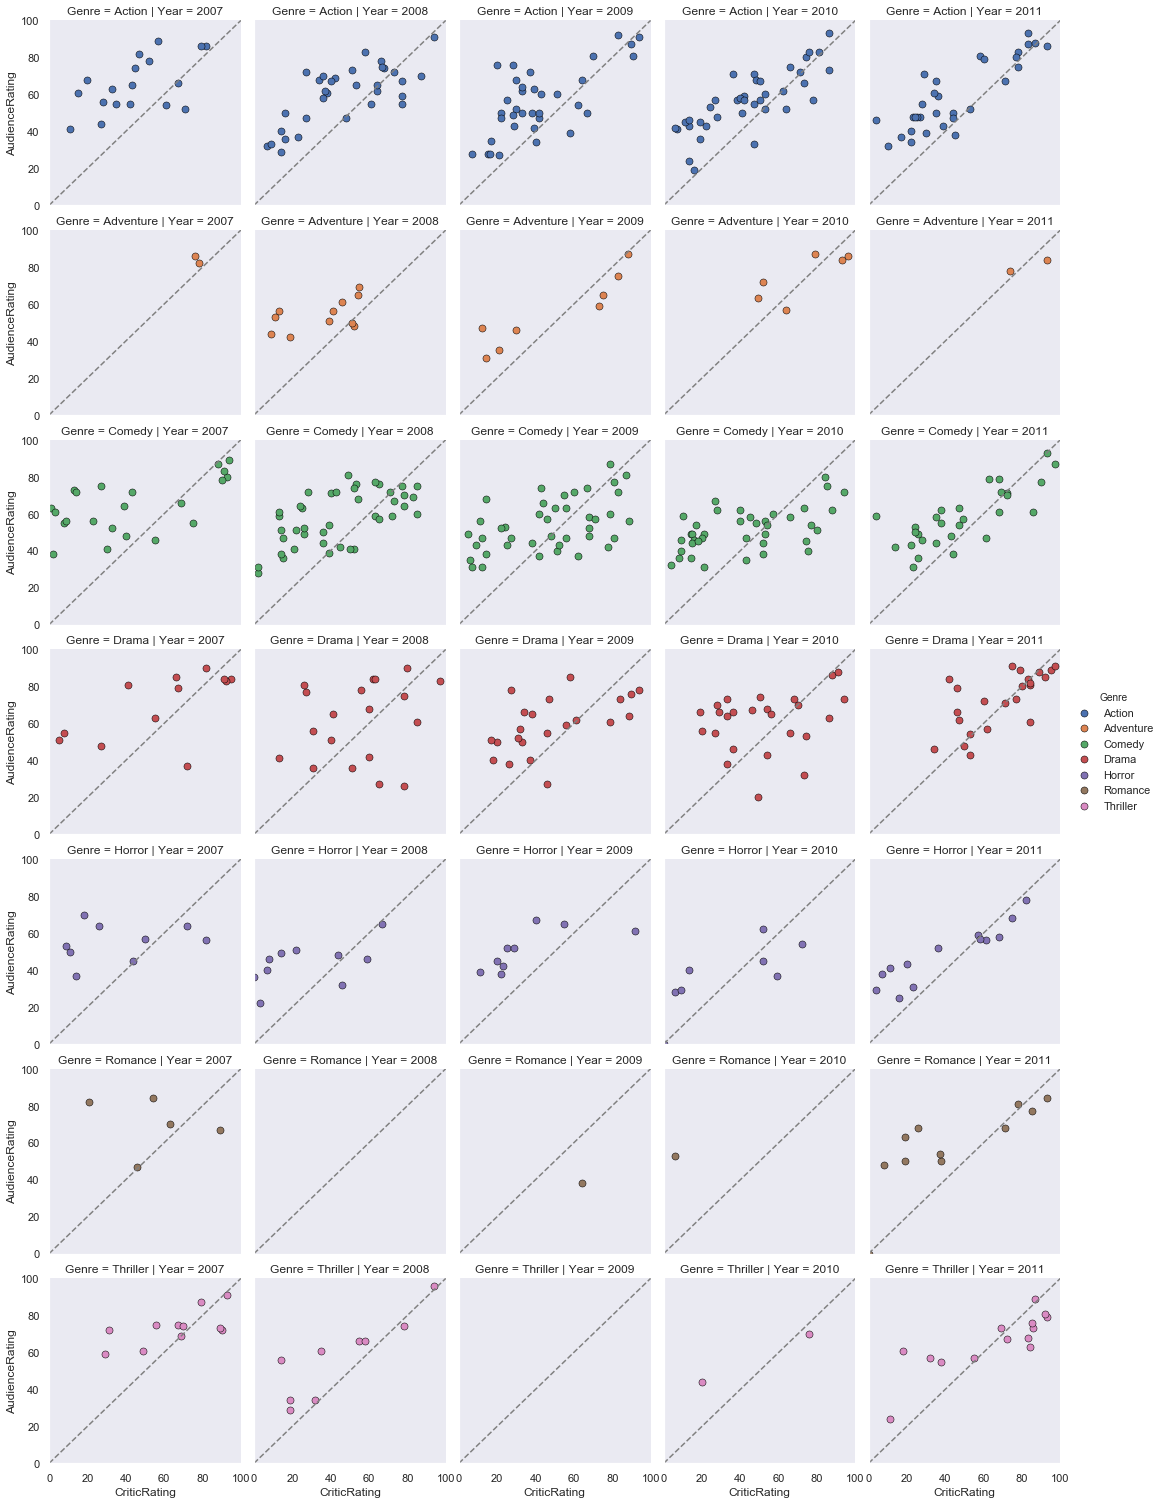

In [52]:
#How to add a legend

g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:  
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend()

In [53]:
#Building Dashboards in Python

from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="darkgrid", color_codes=True)
#allows us to see vistualizetions inside of jupyter notebook
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

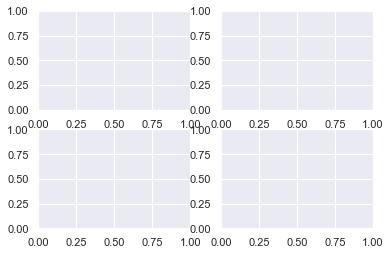

In [54]:
#A dashboard is a subplot that demonstrates differnt types of chart. In this case 4 boxes (2x2)
f, axes = plt.subplots(2,2)

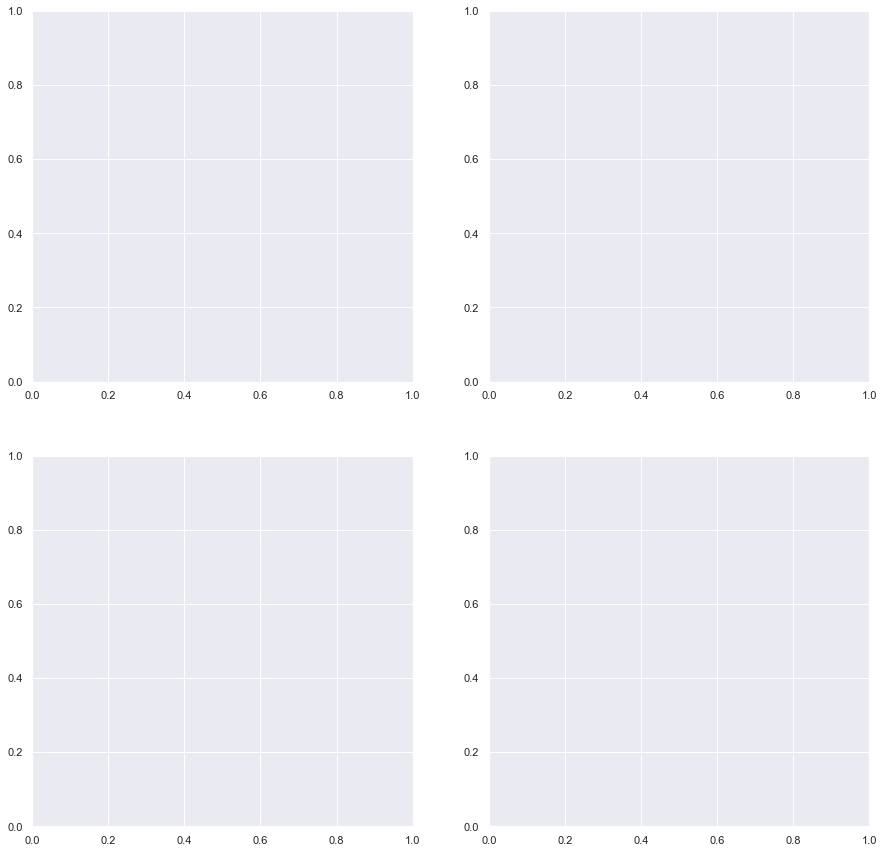

In [55]:
#Lets make it larger
f, axes = plt.subplots(2,2, figsize=(15,15))

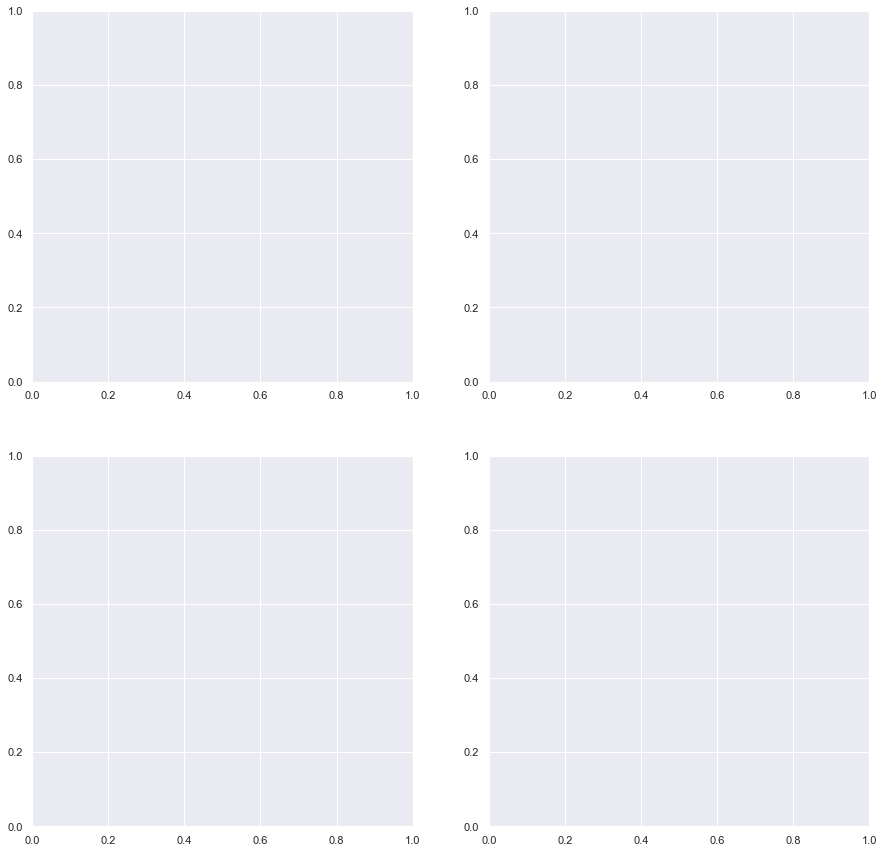

In [56]:
#Change the style to darkgrid(Background)
sns.set(style='darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))

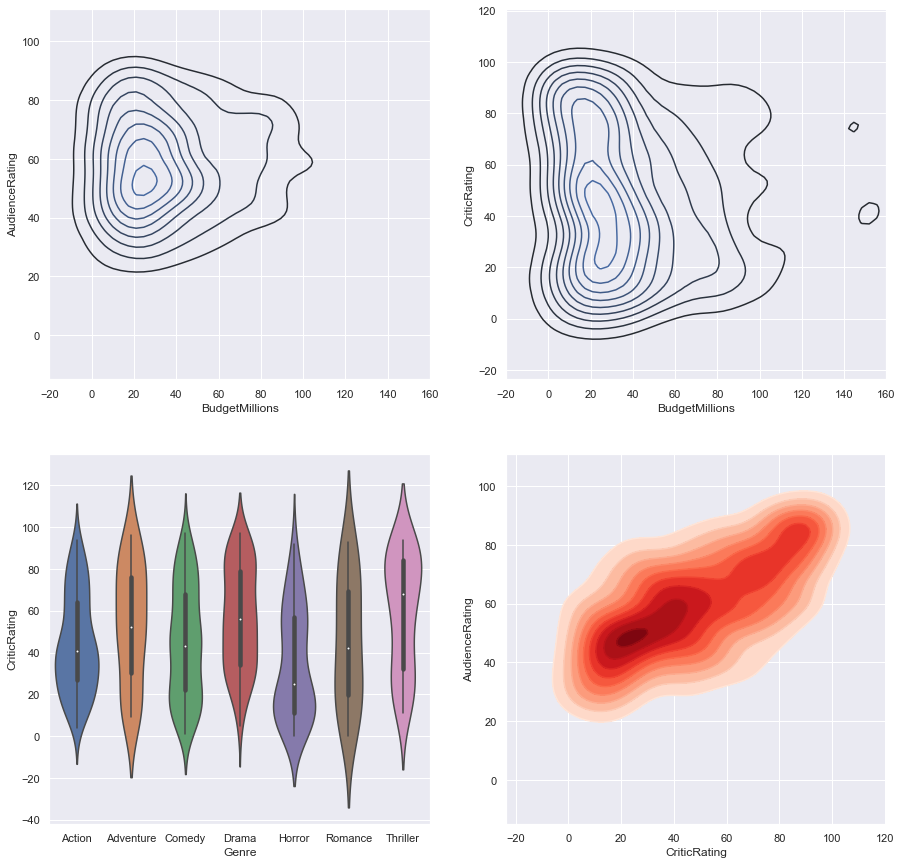

In [57]:
#Now its time to start building
sns.set(style='darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               ax=axes[0,0]) #axes[0,0] identifies plot location
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               ax=axes[0,1])
k3=sns.violinplot(data=movies, x='Genre', y='CriticRating', \
               ax= axes[1,0])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Reds', \
               ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20, 160)) #This limit will apply to the first plot
k2.set(xlim=(-20, 160)) #This limit will apply to the second plot
plt.show() # Eliminates the gird numbering on output

In [58]:
#This dashboard formatt ony works for seaborn plots sns.something, Other plots need differnet formatting to work

In [59]:
#To plot a pyplot graph need the following formatt specifing location first.
#axes[1,1].hist(movies.CriticRating, bins=15)

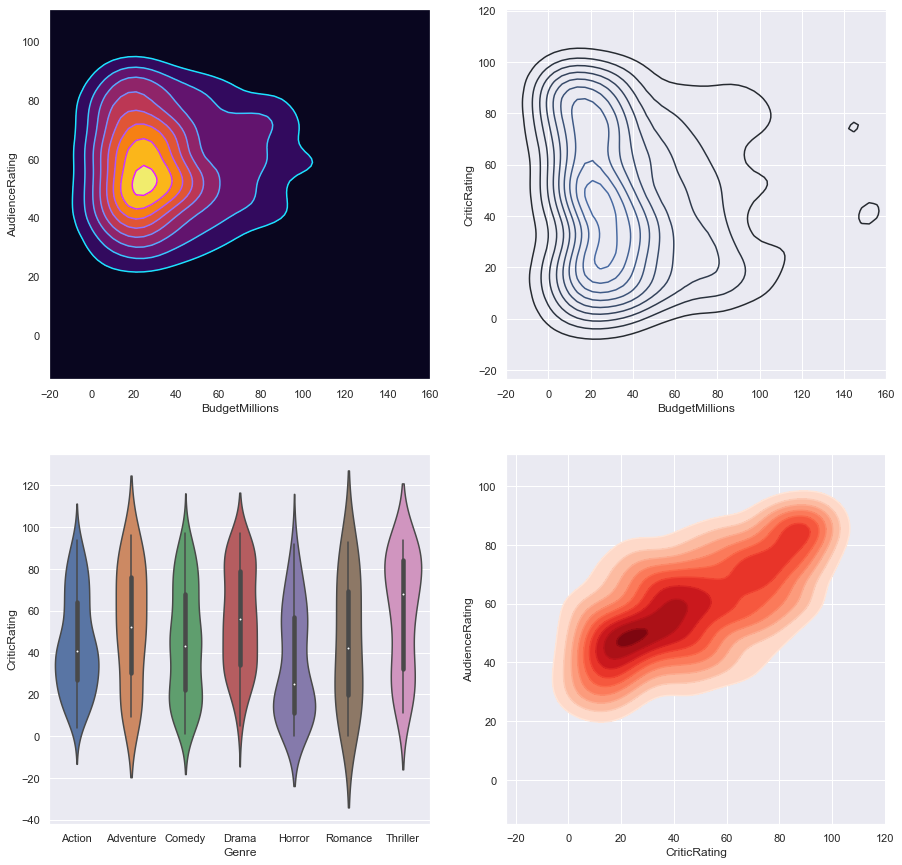

In [60]:
#Styling Dashboards

sns.set(style='darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))

#Lets start with plot [0,0]
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,0]) 
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               cmap='cool', ax=axes[0,0])

k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               ax=axes[0,1])

k3=sns.violinplot(data=movies, x='Genre', y='CriticRating', \
               ax= axes[1,0])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Reds', \
               ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20, 160)) 
k2.set(xlim=(-20, 160)) 
plt.show() 

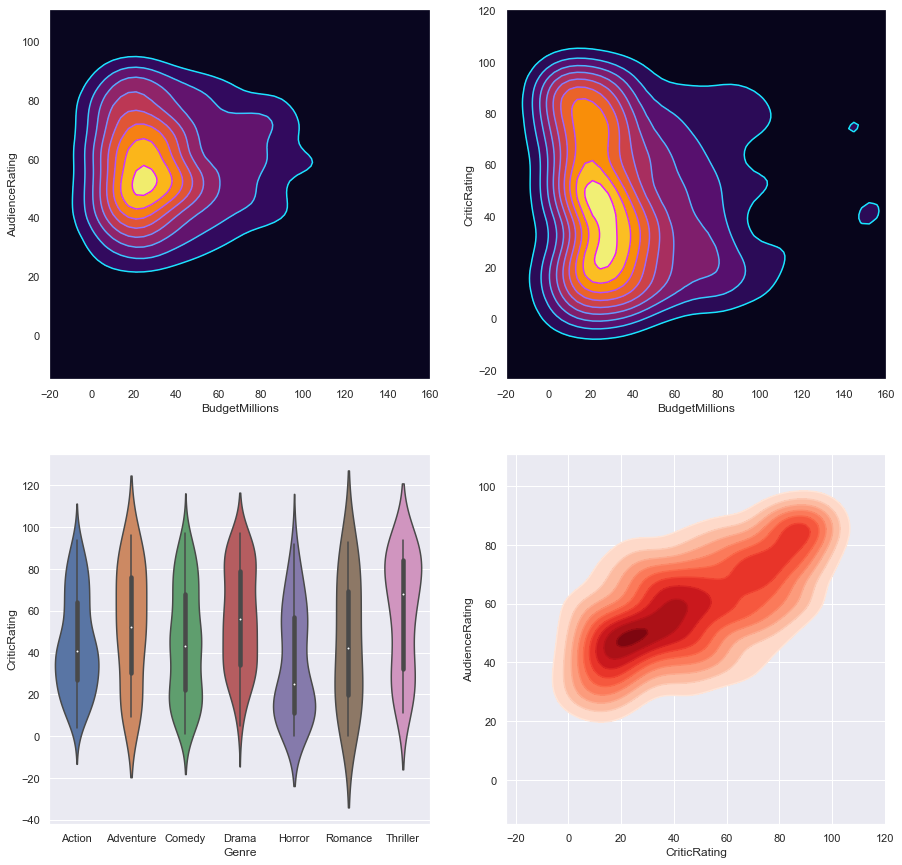

In [61]:
#Now lets edit plot [0,1].  We want to keep the formatt the same so people know they are related
sns.set(style='darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))

k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,0]) 
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               cmap='cool', ax=axes[0,0])

k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               cmap='cool', ax=axes[0,1])

k3=sns.violinplot(data=movies, x='Genre', y='CriticRating', \
               ax= axes[1,0])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Reds', \
               ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20, 160)) 
k2.set(xlim=(-20, 160)) 
plt.show() 

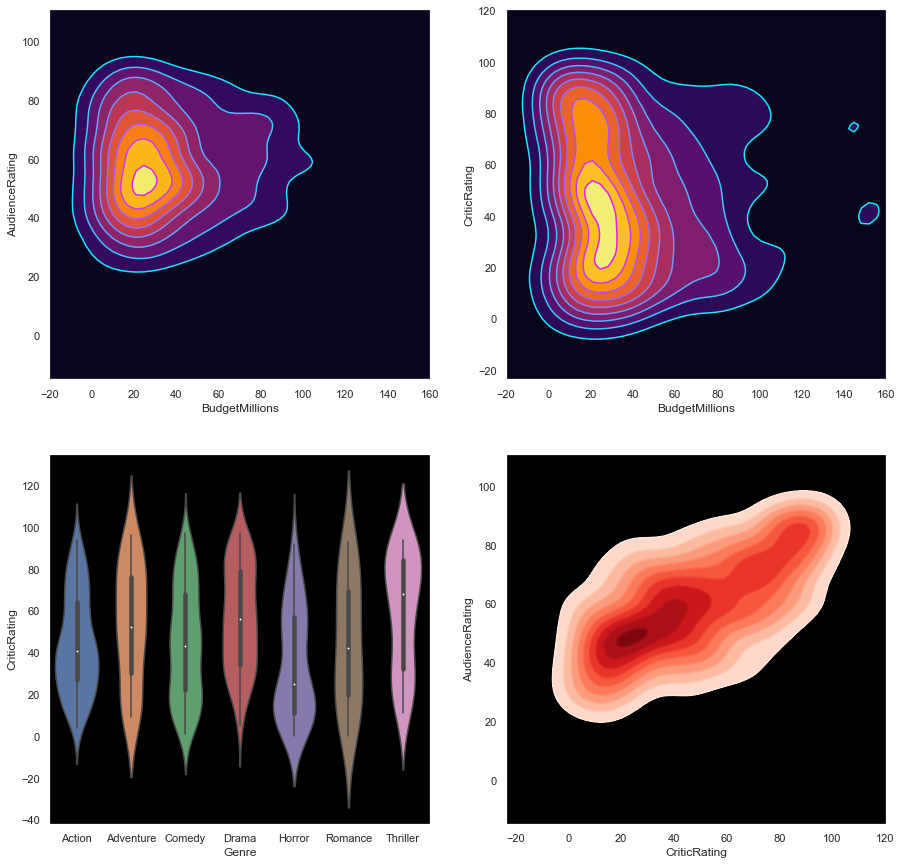

In [62]:
#What if i want all the backgrounds black?

custom_style = {'axes.facecolor':'black'}  #Circumvents pre-defined (limited) styles, by using dict function
sns.set(style="dark", rc=custom_style) #Change from darkgrid to just dark
f, axes = plt.subplots(2,2, figsize=(15,15))

k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,0]) 
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               cmap='cool', ax=axes[0,0])

k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               cmap='cool', ax=axes[0,1])

k3=sns.violinplot(data=movies, x='Genre', y='CriticRating', \
               ax= axes[1,0])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Reds', \
               ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20, 160)) 
k2.set(xlim=(-20, 160)) 
plt.show() 

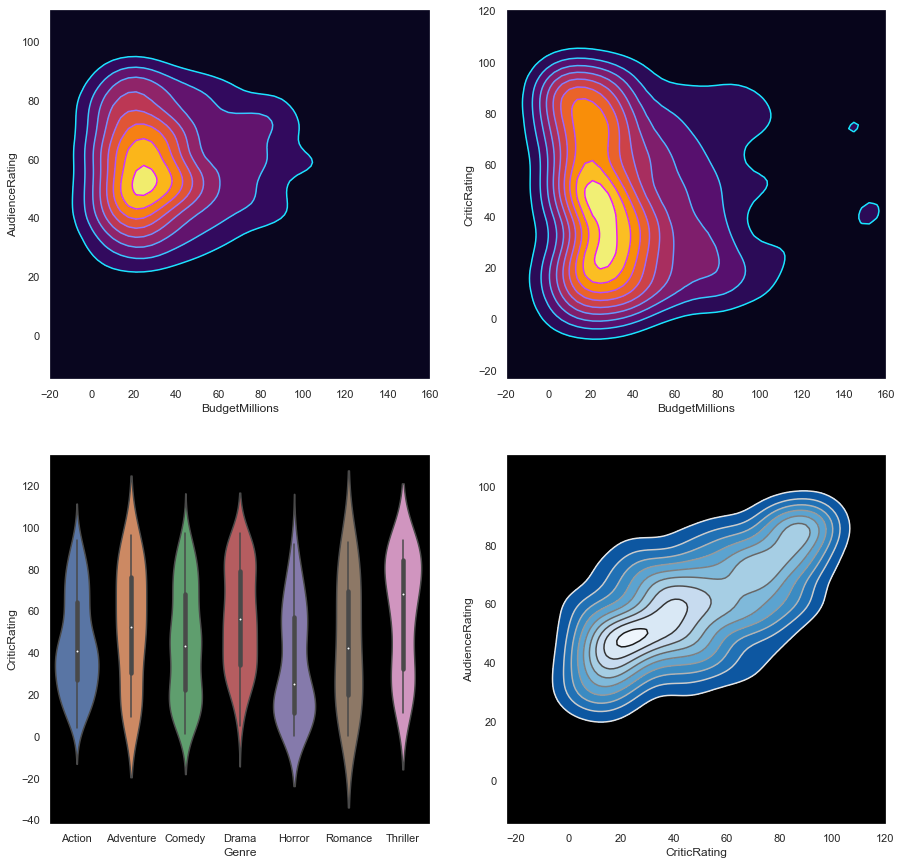

In [63]:
#Now lets edit plot [1,1], the red color scheme does not match out black background

custom_style = {'axes.facecolor':'black'}  
sns.set(style="dark", rc=custom_style) 
f, axes = plt.subplots(2,2, figsize=(15,15))

k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,0]) 
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               cmap='cool', ax=axes[0,0])

k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               cmap='cool', ax=axes[0,1])

k3=sns.violinplot(data=movies, x='Genre', y='CriticRating', \
               ax= axes[1,0])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Blues_r', \
               ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20, 160)) 
k2.set(xlim=(-20, 160)) 
plt.show() 

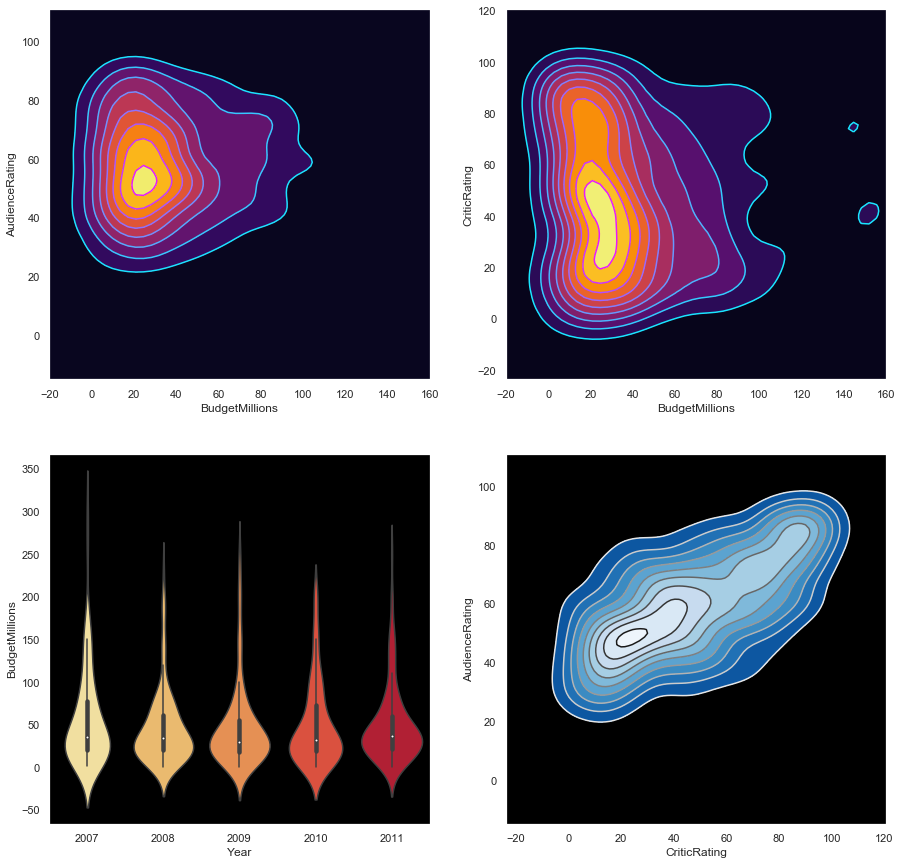

In [64]:
# last but not least the violin plot, lets improve how it looks Plot [1,0]

custom_style = {'axes.facecolor':'black'}  
sns.set(style="dark", rc=custom_style) 
f, axes = plt.subplots(2,2, figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,0]) 
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
               cmap='cool', ax=axes[0,0])

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               shade=True, shade_lowest=True, cmap='inferno', \
               ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
               cmap='cool', ax=axes[0,1])

k3 = sns.violinplot(data=movies, \
                    x='Year', y='BudgetMillions', palette ='YlOrRd', \
                    ax= axes[1,0])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Blues_r', \
               ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20, 160)) 
k2.set(xlim=(-20, 160)) 
plt.show() 

In [65]:
#More advanced visualization techniques

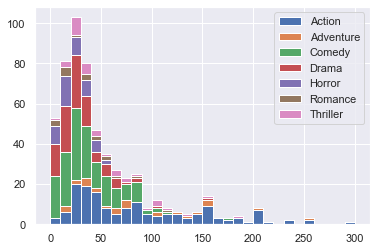

In [68]:
#Thematic Edits
sns.set(style='darkgrid')
mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) #adds labels
plt.legend() #shows labels
plt.show() 

In [69]:
#First change background to whitegrid

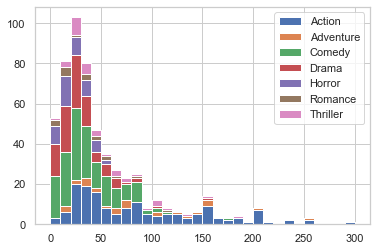

In [70]:
sns.set(style='whitegrid')

mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) 
plt.legend() 
plt.show() 

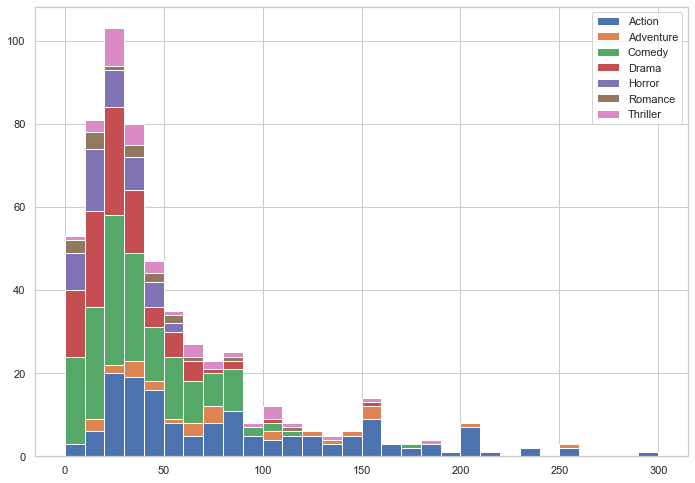

In [72]:
#Second Change, make the chart larger

sns.set(style='whitegrid')
fig, ax = plt.subplots()         #Creates a single subplot
fig.set_size_inches(11.7, 8.27)  #Allows you to modify the size of subplot

mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) 
plt.legend() 
plt.show() 

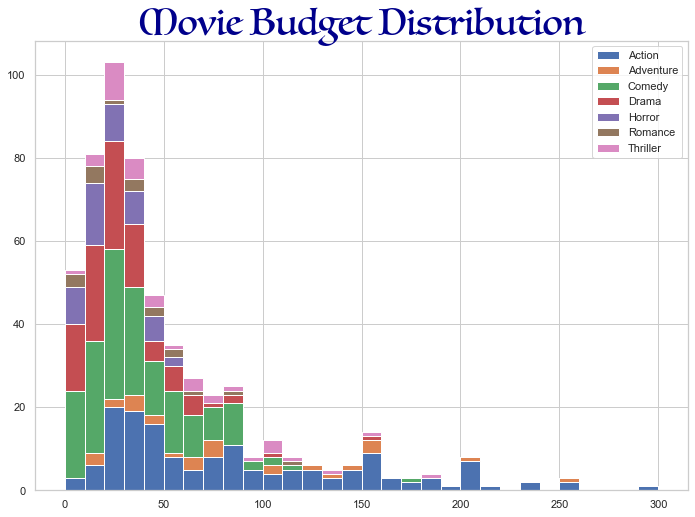

In [80]:
#Third Change: Create a title and make it fancy..

sns.set(style='whitegrid')
fig, ax = plt.subplots()         
fig.set_size_inches(11.7, 8.27)
plt.title("Movie Budget Distribution", fontsize = 35, \
         color = 'DarkBlue', fontname = 'Luminari')

mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) 
plt.legend() 
plt.show() 

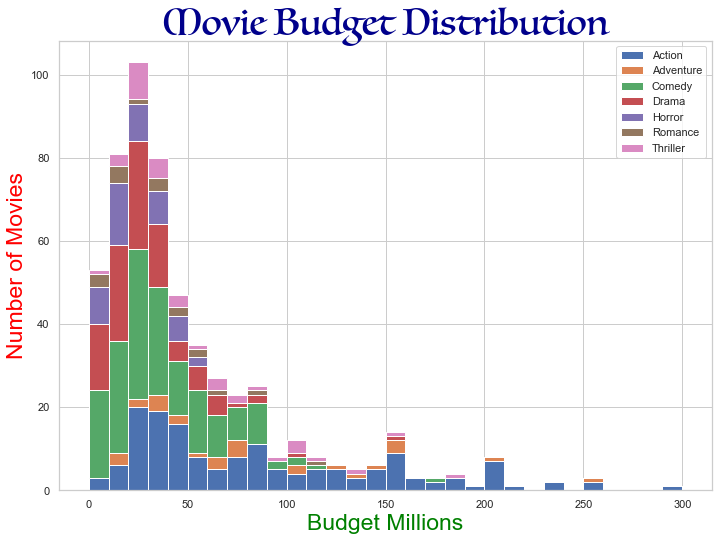

In [82]:
#Fourth Change: Axis Labels

sns.set(style='whitegrid')
fig, ax = plt.subplots()         
fig.set_size_inches(11.7, 8.27)
plt.title("Movie Budget Distribution", fontsize = 35, \
         color = 'DarkBlue', fontname = 'Luminari')
plt.ylabel('Number of Movies', fontsize = 23, color ='Red')
plt.xlabel('Budget Millions', fontsize = 23, color ='Green')

mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) 
plt.legend() 
plt.show() 

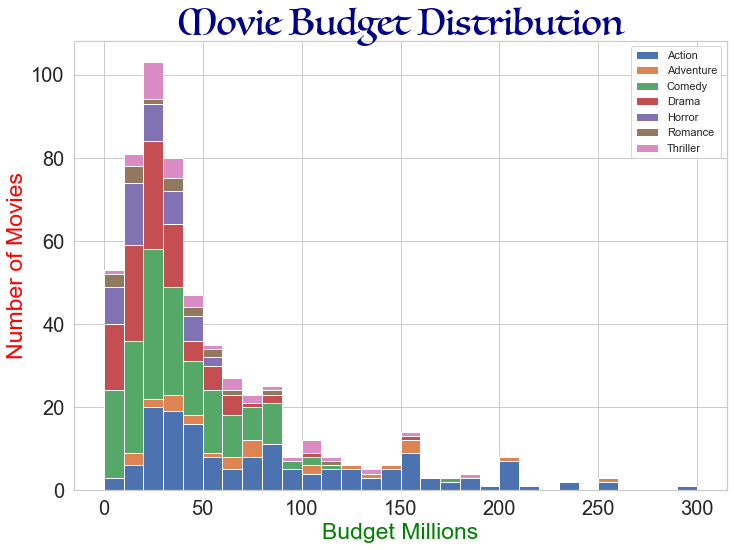

In [83]:
#Fifth Change: Increasing font size on axis ticks

sns.set(style='whitegrid')
fig, ax = plt.subplots()         
fig.set_size_inches(11.7, 8.27)
plt.title("Movie Budget Distribution", fontsize = 35, \
         color = 'DarkBlue', fontname = 'Luminari')
plt.ylabel('Number of Movies', fontsize = 23, color ='Red')
plt.xlabel('Budget Millions', fontsize = 23, color ='Green')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) 
plt.legend() 
plt.show() 

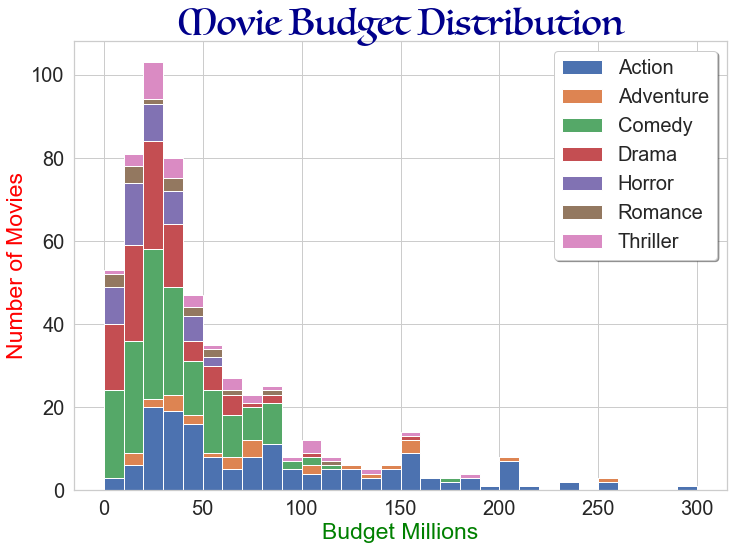

In [88]:
#Sixth Change: Increasing font size and add background to legend

sns.set(style='whitegrid')
fig, ax = plt.subplots()         
fig.set_size_inches(11.7, 8.27)
plt.title("Movie Budget Distribution", fontsize = 35, \
         color = 'DarkBlue', fontname = 'Luminari')
plt.ylabel('Number of Movies', fontsize = 23, color ='Red')
plt.xlabel('Budget Millions', fontsize = 23, color ='Green')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

mylabels = list()
list1 = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

h=plt.hist(list1, bins=30, stacked=True, label=mylabels) 
plt.legend(frameon=True, fancybox=True, shadow=True, \
           framealpha=1, prop={'size':20}) #We are making changes here
plt.show() 